# Cross Entropy Loss

In [1]:
from fastai.vision.all import *

Let's just use some random numbers with a standard deviation of 2 (so we multiply randn by 2) for this example, assuming we have six images and two possible categories (where the first columns represents "3"s and the second is "7"s):

In [2]:
# Creating random activations for simulation of cross-entropy loss
acts = torch.randn((6,2))*2
acts

tensor([[ 0.6896, -0.8912],
        [-0.8046,  2.6453],
        [-2.0471, -1.1733],
        [-0.0234,  1.6463],
        [ 1.3168,  0.7801],
        [ 0.2347, -0.3501]])

In [3]:
# Defining random labels for the 6 images
targ = tensor([0,1,0,1,1,0])

In [4]:
# Step 1: Calculate the softmax of the activations/logits
sm_acts = torch.softmax(acts, dim=1)
sm_acts

tensor([[0.8293, 0.1707],
        [0.0308, 0.9692],
        [0.2945, 0.7055],
        [0.1585, 0.8415],
        [0.6310, 0.3690],
        [0.6422, 0.3578]])

In [5]:
sm_acts.sum(axis=1)

tensor([1., 1., 1., 1., 1., 1.])

In [6]:
# Step 2: Apply the log to change probabilitiy values from 0 to 1 to negative infinity to infinity range 
# in order to get a distinction between values like 0.9 and 0.99 which is ten times better
log_sm_acts = torch.log(sm_acts)
log_sm_acts

tensor([[-0.1871, -1.7680],
        [-3.4811, -0.0313],
        [-1.2226, -0.3488],
        [-1.8422, -0.1725],
        [-0.4604, -0.9971],
        [-0.4429, -1.0278]])

In [7]:
# Applying negative log likelihood
nll_loss = F.nll_loss(log_sm_acts, targ, reduction='none')
nll_loss

tensor([0.1871, 0.0313, 1.2226, 0.1725, 0.9971, 0.4429])

In [8]:
# The above NLL loss is same as below
idx = range(6)
-log_sm_acts[idx, targ]

tensor([0.1871, 0.0313, 1.2226, 0.1725, 0.9971, 0.4429])

In [9]:
# All the above steps can be done in one using F.cross_entropy method
F.cross_entropy(acts, targ, reduction='none')

tensor([0.1871, 0.0313, 1.2226, 0.1725, 0.9971, 0.4429])

---

## Applying Cross Entropy to one batch of Pets dataset

In [10]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)

In [11]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))
dls = pets.dataloaders(path/"images")

/home/harish/miniconda3/envs/fastai/lib/python3.7/site-packages/torch/_tensor.py:1051: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /opt/conda/conda-bld/pytorch_1639180594101/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  ret = func(*args, **kwargs)


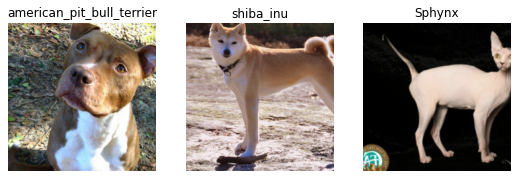

In [12]:
dls.show_batch(nrows=1, ncols=3)

In [13]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [14]:
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

In [15]:
x,y = dls.one_batch()
x.shape, y.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [16]:
# forward pass output
activs = learn.model(x)
activs

TensorBase([[-1.1574, -2.0623, -0.7822,  ..., -1.8275, -1.5647, -1.7579],
        [-3.4278, -2.3016,  0.1543,  ..., -1.8715, -9.3814,  3.2686],
        [-0.7537,  2.0803, -4.8622,  ..., -2.8298, -6.3663,  1.1591],
        ...,
        [ 1.4665, -1.2018, -0.2555,  ...,  0.2192, -3.2029,  1.3626],
        [ 1.5815, -2.0664, -1.1550,  ..., -1.6148, -3.6788,  1.6432],
        [-1.7179, -1.2494, -3.5292,  ..., -0.0209, -8.0390,  3.8722]],
       device='cuda:0', grad_fn=<AliasBackward0>)

In [17]:
preds = torch.softmax(activs, dim=1)
preds

TensorBase([[6.6930e-04, 2.7079e-04, 9.7409e-04,  ..., 3.4247e-04, 4.4539e-04,
         3.6716e-04],
        [1.3467e-05, 4.1533e-05, 4.8413e-04,  ..., 6.3853e-05, 3.4967e-08,
         1.0902e-02],
        [7.0810e-05, 1.2047e-03, 1.1636e-06,  ..., 8.8814e-06, 2.5859e-07,
         4.7952e-04],
        ...,
        [1.2288e-03, 8.5247e-05, 2.1960e-04,  ..., 3.5304e-04, 1.1524e-05,
         1.1076e-03],
        [1.0872e-02, 2.8315e-04, 7.0447e-04,  ..., 4.4479e-04, 5.6465e-05,
         1.1563e-02],
        [2.9061e-05, 4.6428e-05, 4.7499e-06,  ..., 1.5861e-04, 5.2250e-08,
         7.7816e-03]], device='cuda:0', grad_fn=<AliasBackward0>)

In [18]:
preds.sum(axis=1)

TensorBase([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000], device='cuda:0', grad_fn=<AliasBackward0>)

There are 64 images in a batch and each image has37 categories and hence the shape

In [19]:
log_preds = torch.log(preds)
log_preds.shape

torch.Size([64, 37])

In [20]:
nll_loss = F.nll_loss(log_preds, y, reduction='none')
nll_loss

TensorCategory([ 7.8148,  7.2706, 14.0732, 10.7485, 16.6931, 11.4502,  7.1791,  3.4081,
        10.6771,  9.7545, 13.2737,  8.9590,  7.3556, 13.5306,  6.1181, 13.1387,
        10.4080,  8.1372,  5.1569,  4.5111,  5.9170, 16.4347,  4.6270,  5.4210,
         5.4306, 10.9743,  7.2047, 10.0952,  3.7622, 11.7864,  9.8751,  0.4498,
         2.0301, 11.3846,  3.5348,  0.6710, 14.1227,  9.3317, 19.3672, 13.1008,
         8.8073,  8.5618,  6.3581, 14.8455, 11.9729,  9.8782, 12.7335, 12.6811,
         7.1645,  8.0323, 15.1810,  9.3597,  7.6094, 23.3266, 14.3892, 15.1268,
         0.6767, 14.1957, 15.1369,  9.7452, 10.2240, 12.9397,  1.8055,  9.9776],
       device='cuda:0', grad_fn=<AliasBackward0>)

In [21]:
F.cross_entropy(activs, y, reduction='none')

TensorCategory([ 7.8148,  7.2706, 14.0732, 10.7485, 16.6931, 11.4502,  7.1791,  3.4081,
        10.6771,  9.7545, 13.2737,  8.9590,  7.3556, 13.5306,  6.1181, 13.1387,
        10.4080,  8.1372,  5.1569,  4.5111,  5.9170, 16.4347,  4.6270,  5.4210,
         5.4306, 10.9743,  7.2047, 10.0952,  3.7622, 11.7864,  9.8751,  0.4498,
         2.0301, 11.3846,  3.5348,  0.6710, 14.1227,  9.3317, 19.3672, 13.1008,
         8.8073,  8.5618,  6.3581, 14.8455, 11.9729,  9.8782, 12.7335, 12.6811,
         7.1645,  8.0323, 15.1810,  9.3597,  7.6094, 23.3266, 14.3892, 15.1268,
         0.6767, 14.1957, 15.1369,  9.7452, 10.2240, 12.9397,  1.8055,  9.9776],
       device='cuda:0', grad_fn=<AliasBackward0>)

---

## Multi-category cross-entropy loss: 

Using Pascal dataset

In [22]:
path = untar_data(URLs.PASCAL_2007)

In [23]:
df = pd.read_csv(path/'train.csv')
df.head()

,fname,labels,is_valid
0,000005.jpg,chair,True
1,000007.jpg,car,True
2,000009.jpg,horse person,True
3,000012.jpg,car,False
4,000016.jpg,bicycle,True


In [24]:
def get_x(r): return path/'train'/r['fname']
def get_y(r): return r['labels'].split(' ')

def splitter(df):
    train = df.index[~df['is_valid']].tolist()
    valid = df.index[df['is_valid']].tolist()
    return train,valid

dblock = DataBlock(blocks=(ImageBlock, MultiCategoryBlock),
                   splitter=splitter,
                   get_x=get_x, 
                   get_y=get_y,
                   item_tfms = RandomResizedCrop(128, min_scale=0.35))
dls = dblock.dataloaders(df)

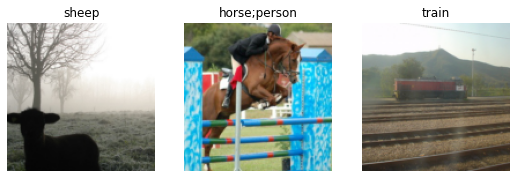

In [25]:
dls.show_batch(nrows=1, ncols=3)

In [26]:
# Get one batch of data
x,y = dls.train.one_batch()

In [27]:
x.shape

torch.Size([64, 3, 128, 128])

In [28]:
# Using torch.where to see the multiple labels
idxs = torch.where(y[0]==1.)[0]
idxs

TensorMultiCategory([12, 14], device='cuda:0')

In [29]:
# getting the respective labels from dls.vocab
dls.train.vocab[idxs]

(#2) ['horse','person']

In [32]:
# Creating a learner
learn = cnn_learner(dls, resnet18)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/harish/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [12]:
# Forward pass
activs = learn.model(x)
activs.shape

torch.Size([64, 20])

In [13]:
activs[0].shape, y[0].shape

(torch.Size([20]), torch.Size([20]))

In [ ]:
# Defining the loss
def binary_cross_entropy(inputs, targets):
    inputs = inputs.sigmoid()
    return torch.where(targets==1, inputs, 1-inputs).log().mean()

In [15]:
binary_cross_entropy(activs[0], y[0])

tensor(-1.6980, device='cuda:0', grad_fn=<MeanBackward0>)

In [16]:
# Pytorch equivalent
loss_func = nn.BCEWithLogitsLoss()
loss = loss_func(activs[0], y[0])
loss

tensor(1.6980, device='cuda:0', grad_fn=<BinaryCrossEntropyWithLogitsBackward>)

In [17]:
loss_func = nn.BCELoss()
loss = loss_func(torch.sigmoid(activs[0]), y[0])
loss

tensor(1.6980, device='cuda:0', grad_fn=<BinaryCrossEntropyBackward>)

In [ ]:
def accuracy_multi(inp, targ, thresh=0.5, sigmoid=True):
    "Compute accuracy when `inp` and `targ` are the same size."
    if sigmoid: inp = inp.sigmoid()
    return ((inp>thresh)==targ.bool()).float().mean()

In [18]:
accuracy_multi(activs[0], y[0])

tensor(0.3500, device='cuda:0')

---
# Simulating a binary cross entropy
---

In [19]:
# Creating random activations for simulation of cross-entropy loss fro 6 images
acts = torch.randn((6,3))*2
acts

tensor([[-0.0167,  0.7360,  0.0559],
        [-0.6028, -2.6059, -0.4274],
        [ 2.2700,  1.5193, -1.7909],
        [-2.1975,  4.0680, -2.1194],
        [ 1.2259, -0.6581,  0.7091],
        [ 1.8555,  0.9128, -2.0179]])

In [ ]:
# Defining random labels for the 6 images
targ = tensor([0,0,1],
              [1,0,1],
              [0,1,1],
              [1,1,1],
              [1,1,0],
              [0,0,0],)

In [21]:
# Step 1: Calculate the sigmoid of the activations/logits
sm_acts = torch.sigmoid(acts)
sm_acts

tensor([[0.4958, 0.6761, 0.5140],
        [0.3537, 0.0688, 0.3947],
        [0.9064, 0.8204, 0.1430],
        [0.1000, 0.9832, 0.1072],
        [0.7731, 0.3412, 0.6702],
        [0.8648, 0.7136, 0.1173]])

In [ ]:
inputs = sm_acts
torch.where(targ==1, inputs, inputs).log()

tensor([[-0.4642, -2.6249, -0.4227],
        [-0.8705, -0.2727, -0.0619],
        [-0.1276, -0.1197, -4.6744],
        [-0.2842, -1.5288, -2.7371],
        [-0.8247, -0.2131, -0.0996],
        [-2.4289, -0.7816, -0.8502]])

In [ ]:
targ

tensor([[0, 0, 1],
        [1, 0, 1],
        [0, 1, 1],
        [1, 1, 1],
        [1, 1, 0],
        [0, 0, 0]])

In [ ]:
# checking the accuracy of the forward pass
accuracy_multi(acts, targ)

tensor(0.5000)